Install Packages

In [11]:
# Install required packages (only run if not already installed)
!pip install seaborn scikit-learn

Load and Explore the Dataset

In [12]:
import pandas as pd

# Load CSV
data = pd.read_csv("spam.csv", encoding="latin-1")[["v1", "v2"]]
data.columns = ["label", "message"]  # rename columns

# Encode labels: ham = 0, spam = 1
data["label_encoded"] = data["label"].map({"ham": 0, "spam": 1})

# Preview first 5 rows
print(data.head())

# Total messages
print("Total messages:", len(data))


  label                                            message  label_encoded
0   ham  Go until jurong point, crazy.. Available only ...              0
1   ham                      Ok lar... Joking wif u oni...              0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...              1
3   ham  U dun say so early hor... U c already then say...              0
4   ham  Nah I don't think he goes to usf, he lives aro...              0
Total messages: 5572


Quick Data Exploration

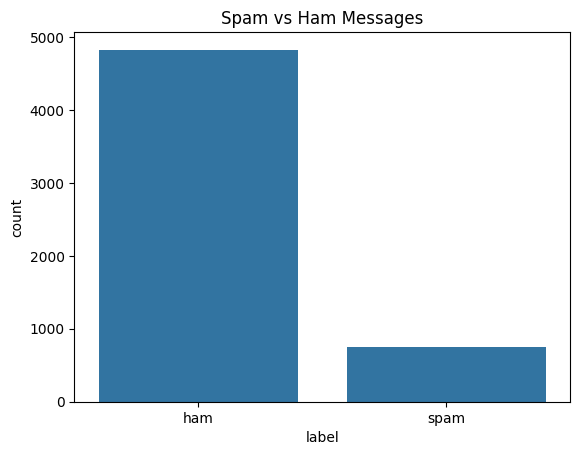

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=data)
plt.title("Spam vs Ham Messages")
plt.show()


Split Dataset into Train and Test Sets

In [14]:
from sklearn.model_selection import train_test_split
 # Features (SMS messages)
X = data["message"]

# Labels (0 = ham, 1 = spam)
y = data["label_encoded"]
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% of data for testing
    random_state=42,    # ensures reproducibility
    stratify=y          # keeps same ham/spam ratio in train/test
)

# Print number of samples in each set
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
# Check distribution of labels in train and test sets
print("Train label counts:\n", y_train.value_counts())
print("Test label counts:\n", y_test.value_counts())


Training samples: 4457
Testing samples: 1115
Train label counts:
 label_encoded
0    3859
1     598
Name: count, dtype: int64
Test label counts:
 label_encoded
0    966
1    149
Name: count, dtype: int64


Convert text to numbers (TF-IDF vectorization)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Train multiple ML models


Naive Bayes Accuracy: 0.9731
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       0.98      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



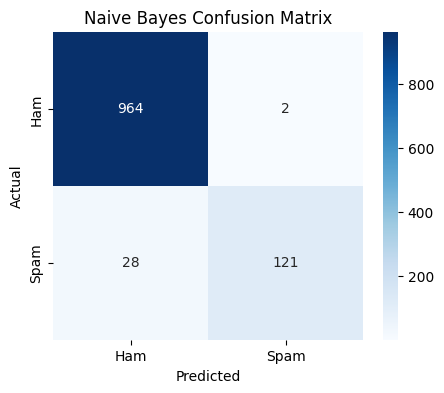


Logistic Regression Accuracy: 0.9722
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



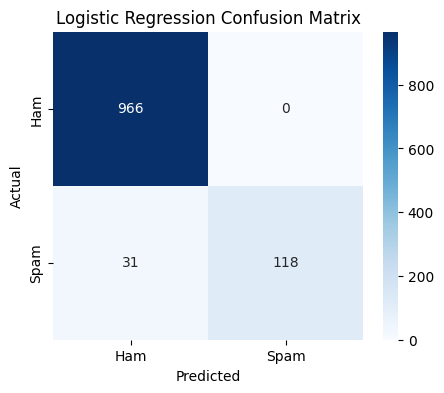


SVM Accuracy: 0.9848
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       0.99      0.90      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



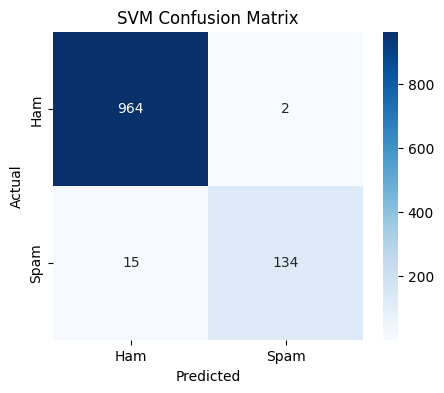


Random Forest Accuracy: 0.9776
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       966
        Spam       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



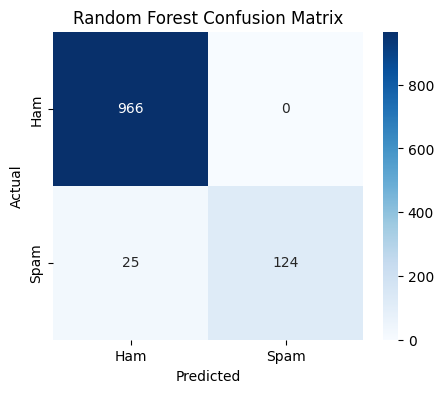


Gradient Boosting Accuracy: 0.9632
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       0.99      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



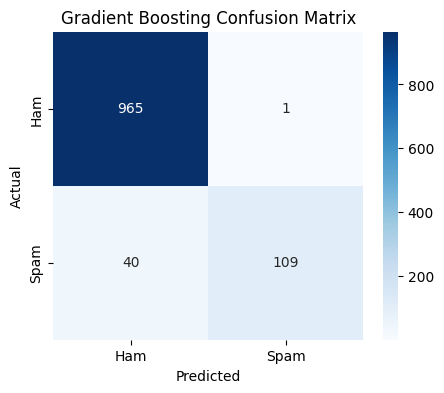

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Compare model accuracies

In [17]:
print("=== Model Accuracy Comparison ===")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


=== Model Accuracy Comparison ===
Naive Bayes: 0.9731
Logistic Regression: 0.9722
SVM: 0.9848
Random Forest: 0.9776
Gradient Boosting: 0.9632


Test new SMS messages

In [19]:
# -------------------------------
# Function to predict SMS type
# -------------------------------
def predict_sms(message):
    """
    Predicts whether an SMS message is Spam or Not Spam.

    Parameters:
    - message (str): The SMS text to classify

    Returns:
    - str: "Spam" or "Not Spam"
    """
    # Convert the text message into numeric features using the trained TF-IDF vectorizer
    vect_message = vectorizer.transform([message])

    # Predict using the trained Naive Bayes model
    prediction = models["Naive Bayes"].predict(vect_message)[0]

    # Return human-readable result
    return "Spam" if prediction == 1 else "Not spam"

# -------------------------------
# Example: Dynamic testing
# -------------------------------
# User can input any SMS message
user_sms = input("Enter an SMS message to test: ")

# Make prediction and display result
print(f"Prediction: {predict_sms(user_sms)}")

# -------------------------------
# Sample input/output
# -------------------------------
# Input: "Congratulations! You won a $1000 gift card. Call now!"
# Output: "Prediction: Spam"
#
# Input: "Hey, are we meeting for lunch today?"
# Output: "Prediction: Ham"


Enter an SMS message to test: hi
Prediction: Not spam
